In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Kriging Calculations for 3 Observation Points

In [2]:
dobs = np.array([2.,4.,6.])
dest = np.array([3.,5.,8.])

In [64]:
Dobs = np.abs(dobs-dobs.reshape((-1,1))); Dobs

array([[0., 2., 4.],
       [2., 0., 2.],
       [4., 2., 0.]])

In [65]:
Dest = np.abs(dest-dobs.reshape((-1,1))); Dest

array([[1., 3., 6.],
       [1., 1., 4.],
       [3., 1., 2.]])

In [11]:
C = lambda h: 100*np.exp(-0.3*h)

In [66]:
Cobs = C(Dobs); Cobs

array([[100.        ,  54.88116361,  30.11942119],
       [ 54.88116361, 100.        ,  54.88116361],
       [ 30.11942119,  54.88116361, 100.        ]])

In [67]:
Cest = C(Dest); Cest

array([[74.08182207, 40.65696597, 16.52988882],
       [74.08182207, 74.08182207, 30.11942119],
       [40.65696597, 74.08182207, 54.88116361]])

In [68]:
unit = np.ones(4)
unit[-1] = 0
unit

array([1., 1., 1., 0.])

In [69]:
LHS = np.concatenate((Cobs,unit[:-1].reshape((-1,1))),axis=1)
LHS = np.concatenate((LHS,unit.reshape((1,-1))),axis=0); LHS

array([[100.        ,  54.88116361,  30.11942119,   1.        ],
       [ 54.88116361, 100.        ,  54.88116361,   1.        ],
       [ 30.11942119,  54.88116361, 100.        ,   1.        ],
       [  1.        ,   1.        ,   1.        ,   0.        ]])

In [70]:
RHS = np.concatenate((Cest,unit[:-1].reshape((1,-1))),axis=0); RHS

array([[74.08182207, 40.65696597, 16.52988882],
       [74.08182207, 74.08182207, 30.11942119],
       [40.65696597, 74.08182207, 54.88116361],
       [ 1.        ,  1.        ,  1.        ]])

In [49]:
lamda = np.linalg.solve(LHS,RHS); lamda

array([[ 4.96008266e-01,  1.76943105e-02,  1.84069234e-01],
       [ 4.86297423e-01,  4.86297423e-01,  8.30498964e-02],
       [ 1.76943105e-02,  4.96008266e-01,  7.32880870e-01],
       [-2.74051541e+00, -2.74051541e+00, -2.85088571e+01]])

In [41]:
yobs = np.array([30,50,20]).reshape((-1,1)); yobs

array([[30],
       [50],
       [20]])

In [48]:
yest = (yobs*lamda[:-1,:]).sum(axis=0); yest

array([39.54900535, 34.76586579, 24.33218923])

In [51]:
beta = lamda[-1,:]; beta

array([ -2.74051541,  -2.74051541, -28.50885711])

In [59]:
err_var = 100-beta-(Cest*lamda[:-1,:]).sum(axis=0); err_var

array([29.25012312, 29.25012312, 82.7434434 ])

In [60]:
err_std = np.sqrt(err_var); err_std

array([5.4083383 , 5.4083383 , 9.09634231])

In [72]:
yest_min = yest-err_std*1.96; yest_min

array([28.94866229, 24.16552273,  6.5033583 ])

In [73]:
yest_max = yest+err_std*1.96; yest_max

array([50.14934841, 45.36620885, 42.16102016])

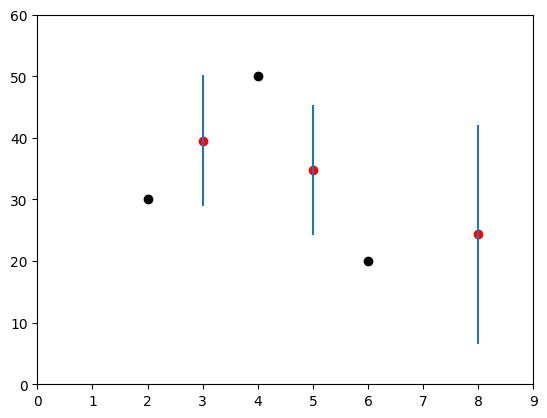

In [80]:
plt.scatter(dobs,yobs,c='k')
plt.scatter(dest,yest,c='r')
for i in range(3):
  plt.vlines(dest[i],yest_min[i],yest_max[i])
plt.xlim((0,9))
plt.ylim((0,60))
plt.show()

In [87]:
def kriging(dobs,yobs,dest,cov):
  #Step 1: Distance Matrices
  Dobs = np.abs(dobs-dobs.reshape((-1,1)))
  Dest = np.abs(dest-dobs.reshape((-1,1)))
  #Step 3: Covariance Matrices
  Cobs = cov(Dobs)
  Cest = cov(Dest)
  #Step 4: Adding rows of 1
  unit = np.ones(dobs.size+1)
  unit[-1] = 0
  LHS = np.concatenate((Cobs,np.ones(dobs.size).reshape((-1,1))),axis=1)
  LHS = np.concatenate((LHS,unit.reshape((1,-1))),axis=0)
  RHS = np.concatenate((Cest,np.ones(dest.size).reshape((1,-1))),axis=0)
  #Step 5: Solving for lambdas
  lamda = np.linalg.solve(LHS,RHS)
  #Step 6: Calculation of estimated values
  yest = (yobs*lamda[:-1,:]).sum(axis=0)
  #Step 7: Calculation of error
  err_var = 100-lamda[-1,:]-(Cest*lamda[:-1,:]).sum(axis=0)
  err_std = np.sqrt(err_var)
  yest_min = yest-err_std*1.96
  yest_max = yest+err_std*1.96
  return yest, yest_min, yest_max

In [102]:
dest_new = np.linspace(0,9,1001)

In [103]:
ye,yemin,yemax = kriging(dobs,yobs,dest_new,C)

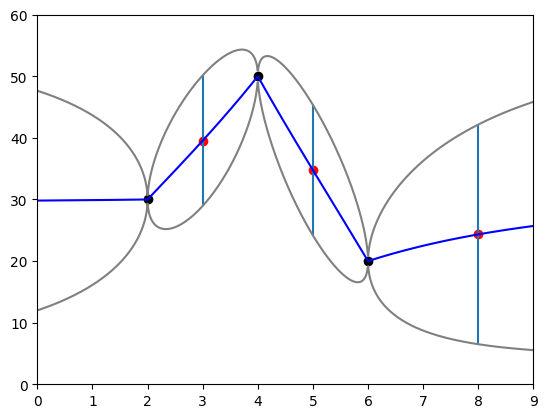

In [104]:
plt.scatter(dobs,yobs,c='k')
plt.scatter(dest,yest,c='r')
for i in range(3):
  plt.vlines(dest[i],yest_min[i],yest_max[i])
plt.plot(dest_new,ye,'b')
plt.plot(dest_new,yemin,'gray')
plt.plot(dest_new,yemax,'gray')
plt.xlim((0,9))
plt.ylim((0,60))
plt.show()

In [ ]:

.